In [130]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict, Counter
import ast

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
mylist = '''
Australia 
Brazil
Czech_republic 
France
Germany
India
Italy
Kazakhstan 
Philippines
Poland 
Russia 
Spain
Turkey
UK
USA
Austria 
Belarus
Bolivia 
Canada 
Chile 
Colombia 
Egypt 
Finland
Greece
Hungary
Indonesia
Israel
Malaysia
Mexico
Morocco
Norway
Pakistan
Saudi_Arabia
South_Africa
Sweden
Thailand
Vietnam
Ukraine
'''

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
countries = list(sorted([el.lower() for el in mylist.split()]))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
countries_untouched = list(sorted([el for el in mylist.split()]))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
countries_official = dict(zip(countries, countries_untouched))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
countries_official['ukraine'] = "Ukraine"
countries_official['usa'] = 'USA'

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
austria_langs = {'de': 51, 'en': 147, 'es': 2}
australia_langs = {'en': 198, 'de': 1, 'es': 1}
belarus_langs = {'ru': 158, 'en': 39, 'id': 1, 'de': 1, 'uk': 1}
bolivia_langs = {'es': 183, 'en': 16, "('es', 'gn')": 1}
brazil_langs = {'pt': 180, 'en': 17, 'es': 1, "('la', 'pt')": 1, "('es', 'en')": 1}
canada_langs = {'en': 198, 'es': 2}
chile_langs = {'es': 184, 'en': 15, "('es', 'gn')": 1}
colombia_langs = {'es': 187, 'en': 12, "('es', 'gn')": 1}
czech_republic_langs = {'cs': 63, 'en': 132, 'es': 1, 'sk': 3, 'de': 1}
egypt_langs = {'ar': 154, 'en': 45, 'hi': 1}
finland_langs = {'fi': 108, 'en': 88, 'de': 1, 'es': 1, 'it': 1, 'pt': 1}
france_langs = {'fr': 147, 'en': 44, 'es': 7, 'pt': 2}
germany_langs = {'de': 76, 'en': 120, 'es': 2, "('de', 'en')": 1, 'it': 1}
greece_langs = {'en': 56, 'el': 134, 'pt': 2, 'sw': 1, 'ja': 1, 'fr': 1, 'es': 2, 'bm': 1, 'it': 1, 'ko': 1}
hungary_langs = {'hu': 62, 'en': 133, 'es': 1, 'nl': 1, 'hi': 1, 'pl': 1, 'pt': 1}
india_langs = {'gu': 18, 'hi': 77, 'en': 78, "('gu', 'hi')": 4, 'ta': 6, 'pa': 5, 'vi': 1, 'ro': 1, "('hi', 'gu')": 1, 'ko': 4, 'te': 1, 'bn': 1, 'doi': 2, 'ml': 1}
indonesia_langs = {'en': 98, 'id': 87, 'ms': 1, "('en', 'id')": 1, "('id', 'ms')": 4, 'de': 1, 'ko': 7, "('ms', 'id')": 1}
israel_langs = {'iw': 121, 'en': 77, 'es': 1, 'it': 1}
italy_langs = {'it': 152, 'en': 35, "('bs', 'hr')": 1, 'es': 10, 'fr': 1, "('co', 'it')": 1}
kazakhstan_langs = {'ru': 104,  'en': 77, 'kk': 6, 'ko': 6,  'ja': 2, 'tt': 3,  'fr': 2}
malaysia_langs = {'en': 164, 'ko': 19, 'id': 9, 'de': 1, "('id', 'ms')": 2, 'ms': 3, "('ms', 'id')": 1, 'es': 1}
mexico_langs = {'es': 118, 'en': 81, 'kri': 1}
morocco_langs = {'en': 50, 'ar': 111, 'fr': 26, 'gu': 1, 'bm': 3, "('ar', 'en')": 1, 'ru': 1, 'es': 3, "('hr', 'bs')": 1, 'kri': 1, 'co': 1, 'it': 1}
norway_langs = {'en': 160, 'sv': 2, 'es': 1, 'no': 36, 'fr': 1}
pakistan_langs = {'hi': 86, 'gu': 24, "('gu', 'hi')": 9, 'en': 60, 'vi': 1, 'ur': 3, 'doi': 1, "('hi', 'gu')": 4, 'pa': 3, 'ko': 7, 'bn': 1, 'es': 1}
philippines_langs = {'tl': 54, 'en': 139, 'de': 1, 'ko': 6}
poland_langs = {'pl': 149, 'en': 50, 'es': 1}
russia_langs = {'ru': 163, 'en': 34, 'it': 1, 'ko': 1, 'be': 1}
saudi_arabia_langs = {'en': 185, 'ar': 8, 'ko': 4, 'ru': 2, 'id': 1}
south_africa_langs = {'en': 147, 'xh': 4, 'zu': 33, "('xh', 'zu')": 2, "('zu', 'xh')": 2, 'st': 3, 'af': 2, 'kri': 1, 'nso': 3, 'gu': 1, 'kn': 1, 'ms': 1}
spain_langs = {'es': 182, 'en': 16, 'tr': 1, "('es', 'en')": 1}
sweden_langs = {'en': 134, 'sv': 62, 'es': 3, 'no': 1}
thailand_langs = {'th': 87, 'en': 82, 'ko': 23, "('lus', 'hi')": 1, 'sv': 1, 'gu': 1, 'de': 1, 'es': 1, 'ja': 1, 'gn': 1, 'sk': 1}
turkiye_langs = {'tr': 189, 'en': 10, 'de': 1}
uk_langs = {'en': 198, 'es': 1, 'de': 1}
ukraine_langs = {'ru': 112, 'uk': 27, 'en': 55, 'id': 1, "('ru', 'uk')": 1, 'it': 1, 'de': 1, 'sw': 1, "('uk', 'ru')": 1}
usa_langs = {'en': 196, 'es': 4}
vietnam_langs = {'en': 64, 'vi': 112, 'ko': 21, 'de': 1, 'rw': 1, 'gn': 1}


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
lang_dicts = [austria_langs, australia_langs, belarus_langs, bolivia_langs, brazil_langs, 
              canada_langs, chile_langs, colombia_langs, czech_republic_langs, 
              egypt_langs, finland_langs, france_langs, germany_langs, greece_langs,
              hungary_langs, india_langs, indonesia_langs, israel_langs, italy_langs,
              kazakhstan_langs, malaysia_langs, mexico_langs, morocco_langs, norway_langs,
              pakistan_langs, philippines_langs, poland_langs, russia_langs, saudi_arabia_langs,
              south_africa_langs, spain_langs, sweden_langs, thailand_langs, turkiye_langs,
              uk_langs, ukraine_langs, usa_langs, vietnam_langs]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
for i in range(len(lang_dicts)):
    el = lang_dicts[i]
    lang_dicts[i] = dict(sorted(el.items(), key=lambda x: x[1], reverse=True))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
data = {'country': countries,
        'languages': lang_dicts}

df = pd.DataFrame(data)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
filepath = "enter_your_filepath"
df.to_csv(filepath)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import io
import base64


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [472]:
df

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,country,languages,top_topic
0,0,australia,"{'en': 147, 'de': 51, 'es': 2}",4
1,1,austria,"{'en': 198, 'de': 1, 'es': 1}",1
2,2,belarus,"{'ru': 158, 'en': 39, 'id': 1, 'de': 1, 'uk': 1}",1
3,3,bolivia,"{'es': 183, 'en': 16, ""('es', 'gn')"": 1}",1
4,4,brazil,"{'pt': 180, 'en': 17, 'es': 1, ""('la', 'pt')"":...",1
5,5,canada,"{'en': 198, 'es': 2}",2
6,6,chile,"{'es': 184, 'en': 15, ""('es', 'gn')"": 1}",1
7,7,colombia,"{'es': 187, 'en': 12, ""('es', 'gn')"": 1}",4
8,8,czech_republic,"{'en': 132, 'cs': 63, 'sk': 3, 'es': 1, 'de': 1}",5
9,9,egypt,"{'ar': 154, 'en': 45, 'hi': 1}",4


In [48]:
data = df
m = folium.Map()
marker_cluster = MarkerCluster()


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
geolocator = Nominatim(user_agent="my-app")

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'en': 147, 'de': 51, 'es': 2}
{'en': 198, 'de': 1, 'es': 1}
{'ru': 158, 'en': 39, 'id': 1, 'de': 1, 'uk': 1}
{'es': 183, 'en': 16, "('es', 'gn')": 1}
{'pt': 180, 'en': 17, 'es': 1, "('la', 'pt')": 1, "('es', 'en')": 1}
{'en': 198, 'es': 2}
{'es': 184, 'en': 15, "('es', 'gn')": 1}
{'es': 187, 'en': 12, "('es', 'gn')": 1}
{'en': 132, 'cs': 63, 'sk': 3, 'es': 1, 'de': 1}
{'ar': 154, 'en': 45, 'hi': 1}
{'fi': 108, 'en': 88, 'de': 1, 'es': 1, 'it': 1, 'pt': 1}
{'fr': 147, 'en': 44, 'es': 7, 'pt': 2}
{'en': 120, 'de': 76, 'es': 2, "('de', 'en')": 1, 'it': 1}
{'el': 134, 'en': 56, 'pt': 2, 'es': 2, 'sw': 1, 'ja': 1, 'fr': 1, 'bm': 1, 'it': 1, 'ko': 1}
{'en': 133, 'hu': 62, 'es': 1, 'nl': 1, 'hi': 1, 'pl': 1, 'pt': 1}
{'en': 78, 'hi': 77, 'gu': 18, 'ta': 6, 'pa': 5, "('gu', 'hi')": 4, 'ko': 4, 'doi': 2, 'vi': 1, 'ro': 1, "('hi', 'gu')": 1, 'te': 1, 'bn': 1, 'ml': 1}
{'en': 98, 'id': 87, 'ko': 7, "('id', 'ms')": 4, 'ms': 1, "('en', 'id')": 1, 'de': 1, "('ms', 'id')": 1}
{'iw': 121, 'en': 77, '

<ipython-input-50-ccbefc3b838a>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()  # Create a figure and axes objects


{'es': 118, 'en': 81, 'kri': 1}
{'ar': 111, 'en': 50, 'fr': 26, 'bm': 3, 'es': 3, 'gu': 1, "('ar', 'en')": 1, 'ru': 1, "('hr', 'bs')": 1, 'kri': 1, 'co': 1, 'it': 1}
{'en': 160, 'no': 36, 'sv': 2, 'es': 1, 'fr': 1}
{'hi': 86, 'en': 60, 'gu': 24, "('gu', 'hi')": 9, 'ko': 7, "('hi', 'gu')": 4, 'ur': 3, 'pa': 3, 'vi': 1, 'doi': 1, 'bn': 1, 'es': 1}
{'en': 139, 'tl': 54, 'ko': 6, 'de': 1}
{'pl': 149, 'en': 50, 'es': 1}
{'ru': 163, 'en': 34, 'it': 1, 'ko': 1, 'be': 1}
{'en': 185, 'ar': 8, 'ko': 4, 'ru': 2, 'id': 1}
{'en': 147, 'zu': 33, 'xh': 4, 'st': 3, 'nso': 3, "('xh', 'zu')": 2, "('zu', 'xh')": 2, 'af': 2, 'kri': 1, 'gu': 1, 'kn': 1, 'ms': 1}
{'es': 182, 'en': 16, 'tr': 1, "('es', 'en')": 1}
{'en': 134, 'sv': 62, 'es': 3, 'no': 1}
{'th': 87, 'en': 82, 'ko': 23, "('lus', 'hi')": 1, 'sv': 1, 'gu': 1, 'de': 1, 'es': 1, 'ja': 1, 'gn': 1, 'sk': 1}
{'tr': 189, 'en': 10, 'de': 1}
{'en': 198, 'es': 1, 'de': 1}
{'ru': 112, 'en': 55, 'uk': 27, 'id': 1, "('ru', 'uk')": 1, 'it': 1, 'de': 1, 'sw': 1


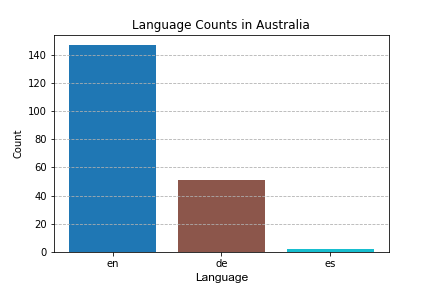
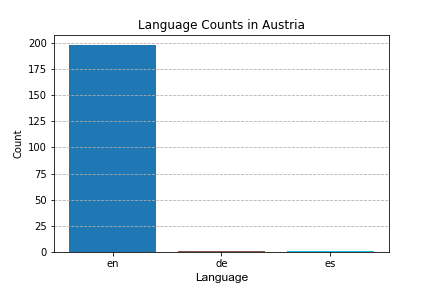
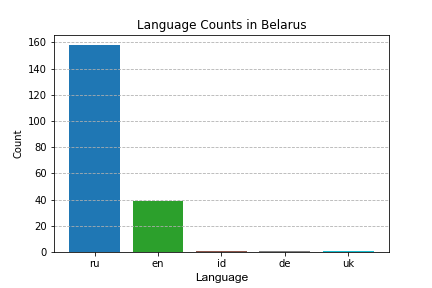
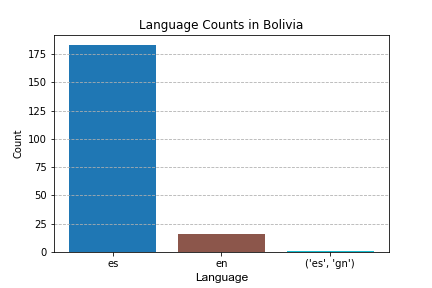
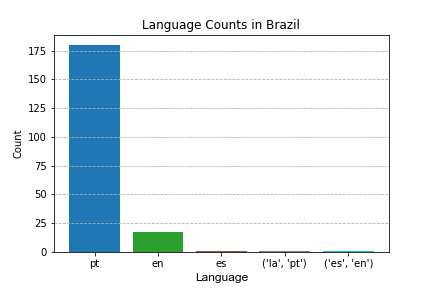
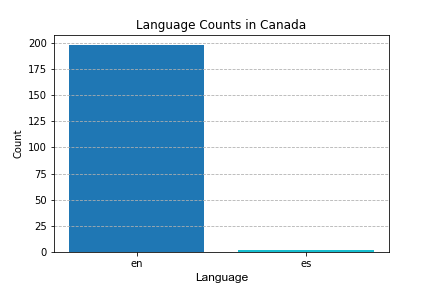
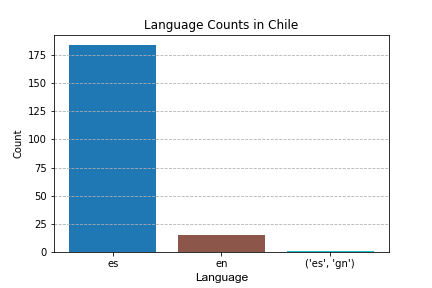
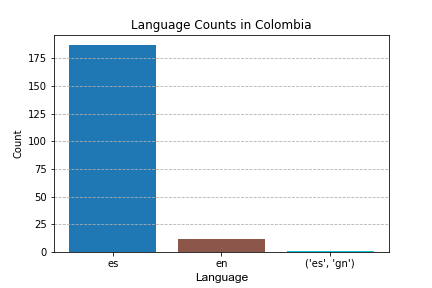
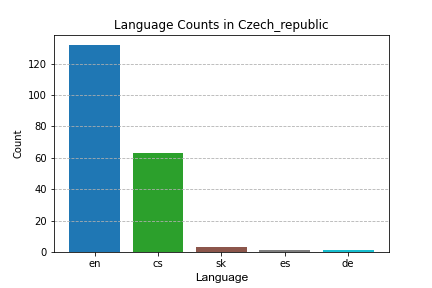
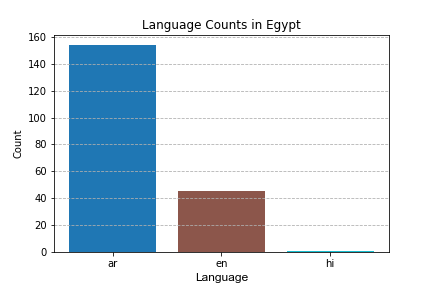
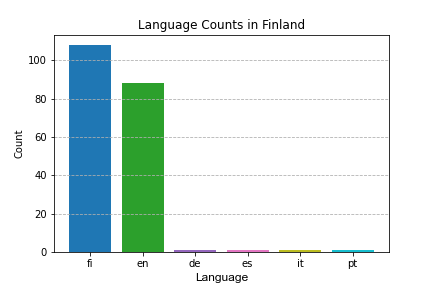
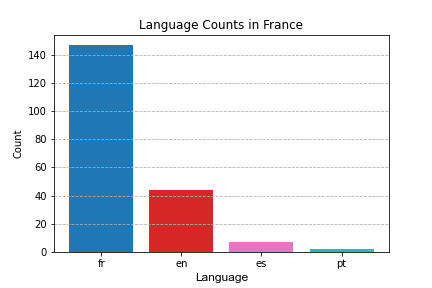
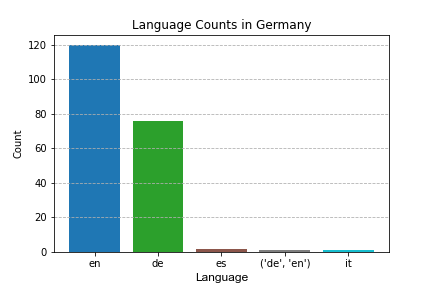
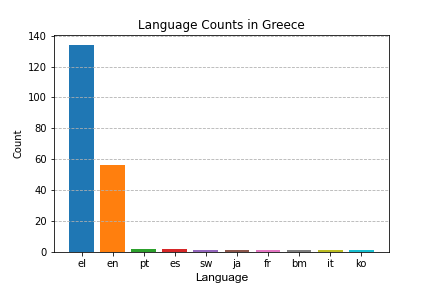
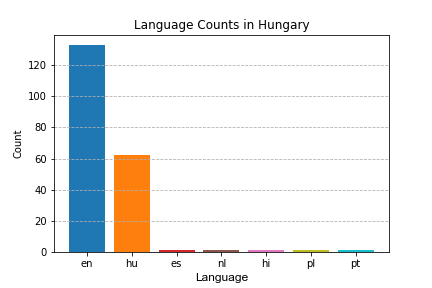
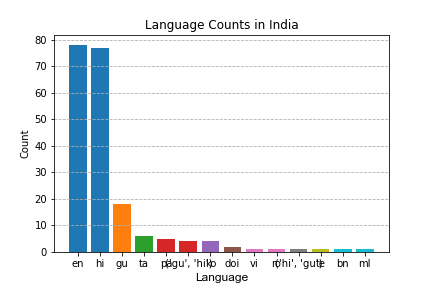
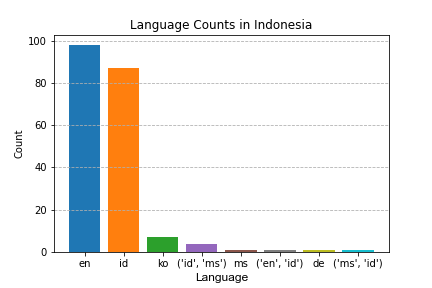
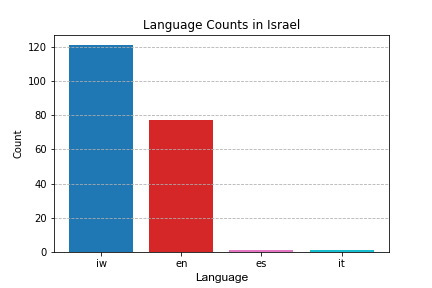
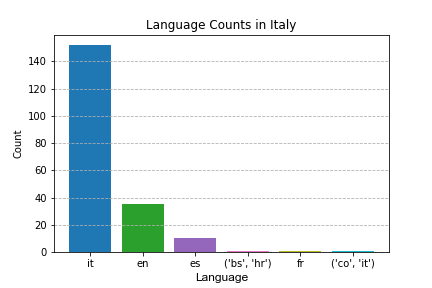
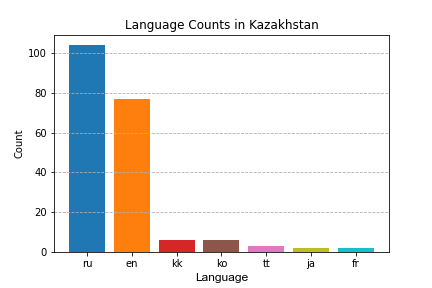
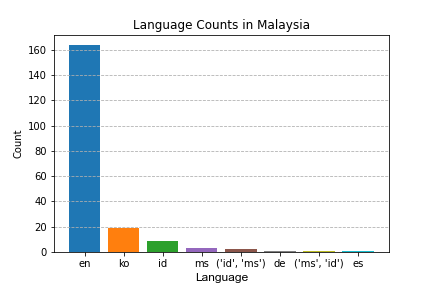
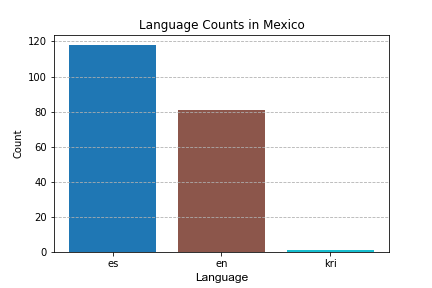
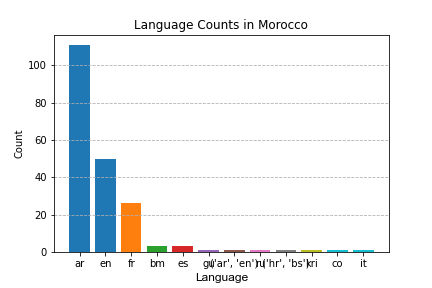
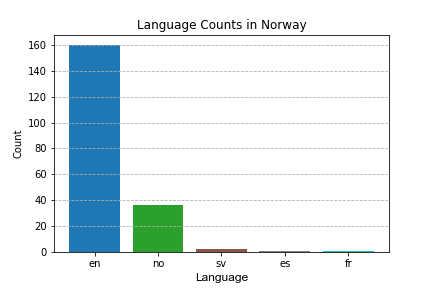
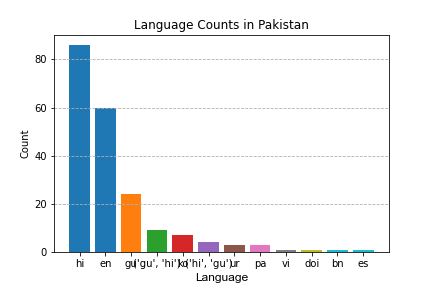
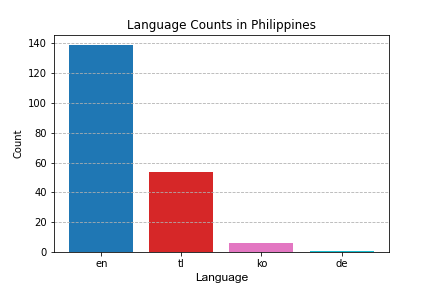
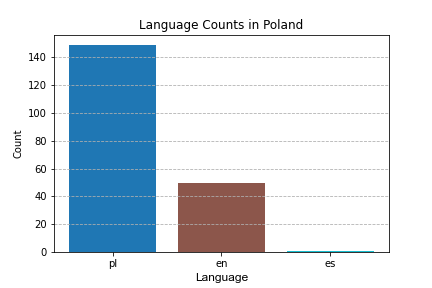
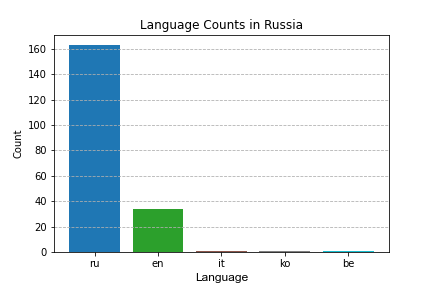
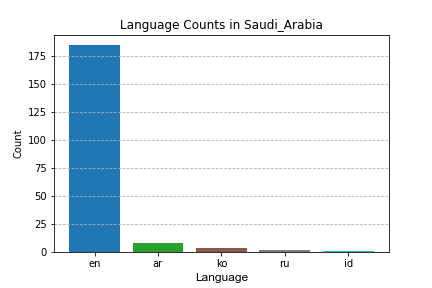
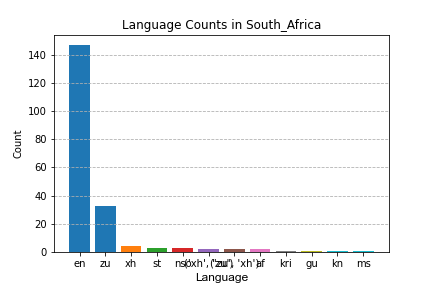
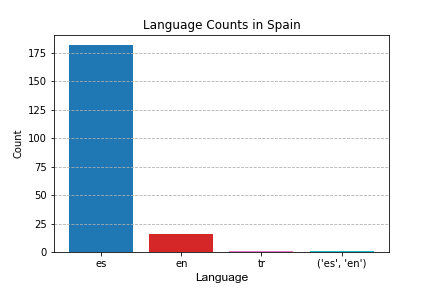
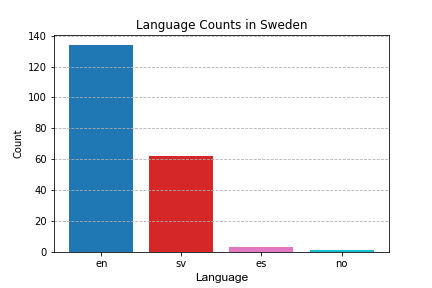
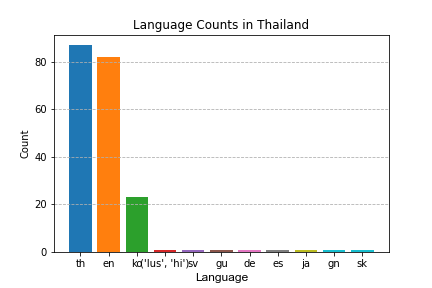
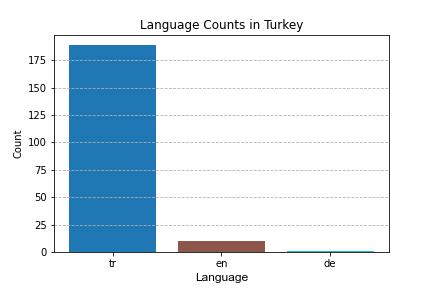
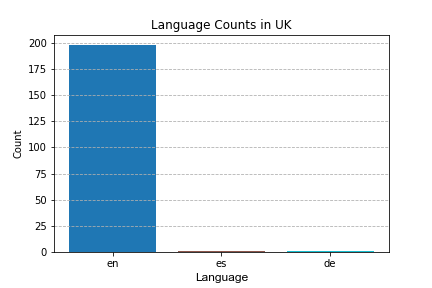
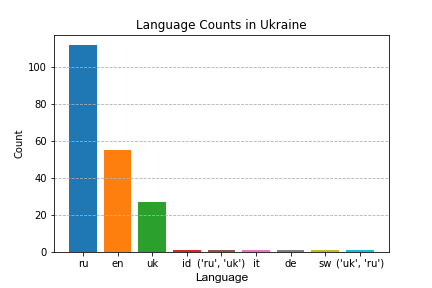
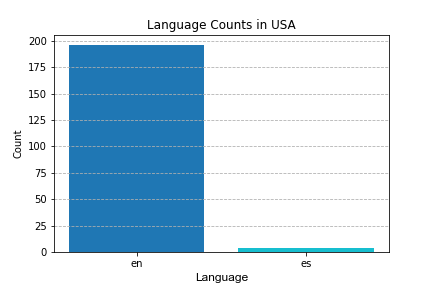
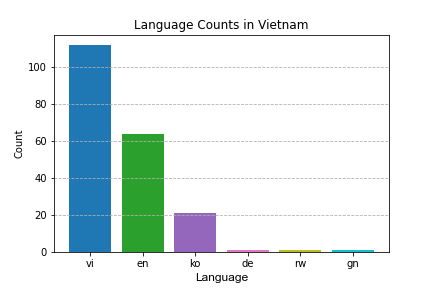

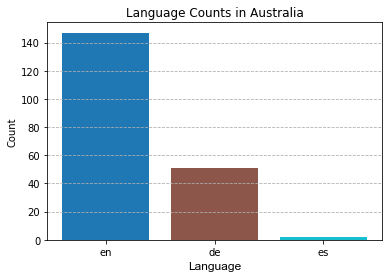

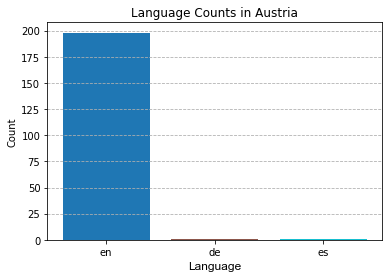

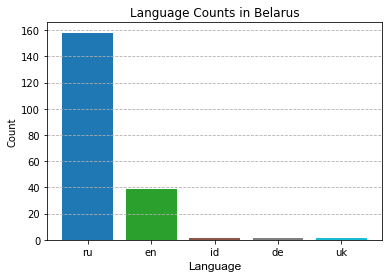

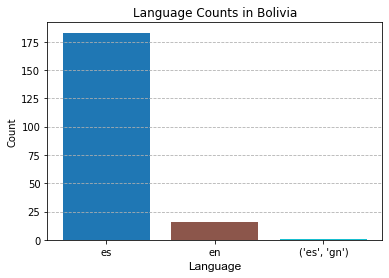

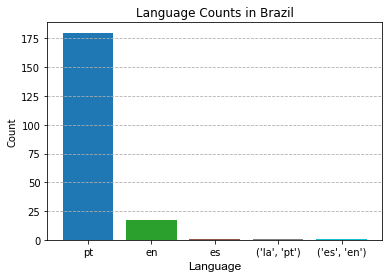

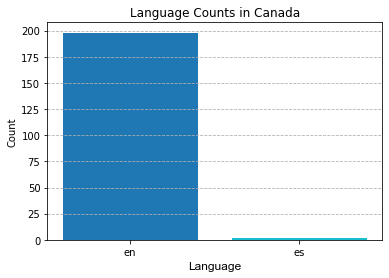

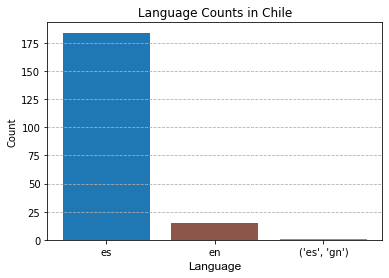

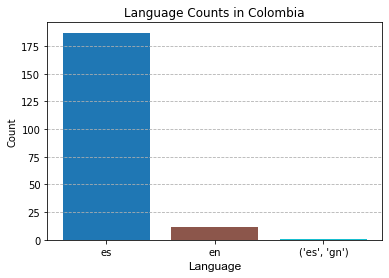

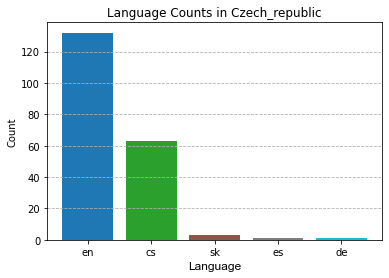

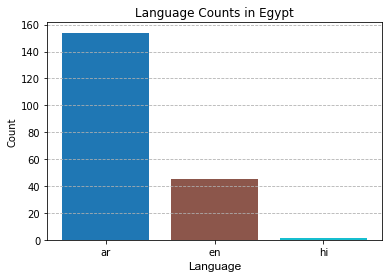

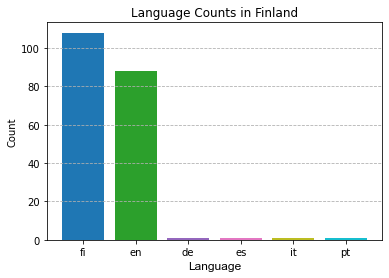

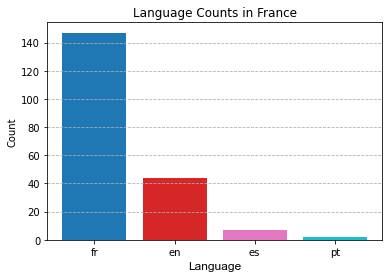

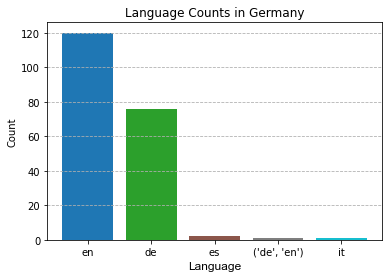

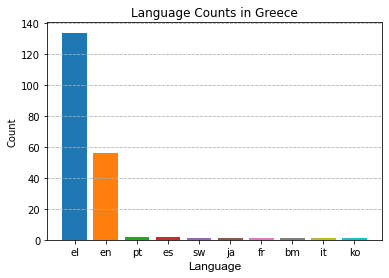

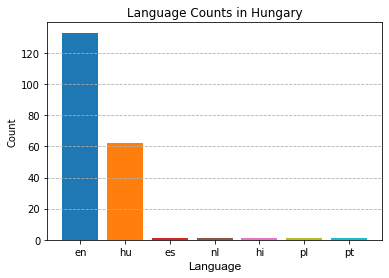

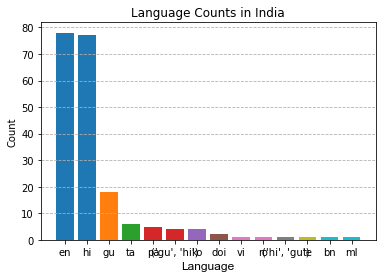

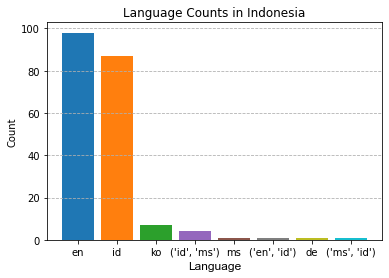

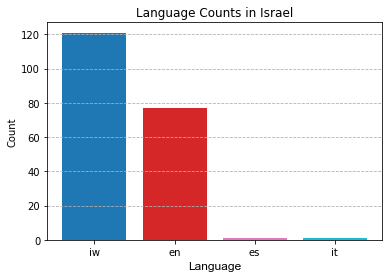

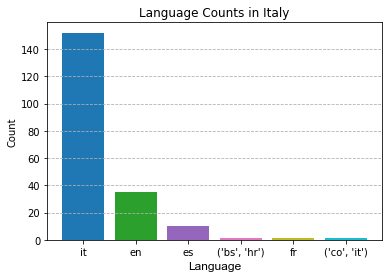

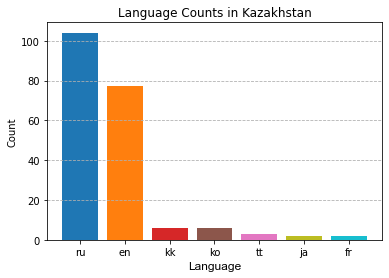

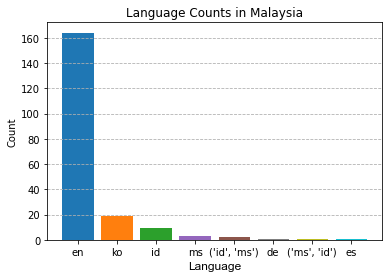

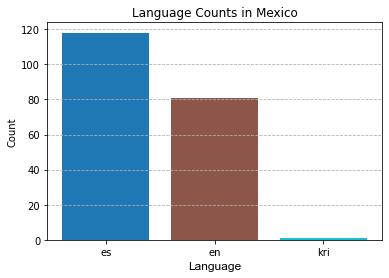

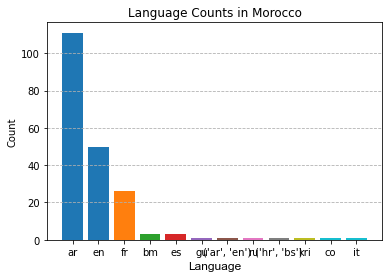

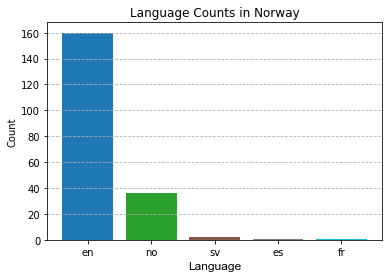

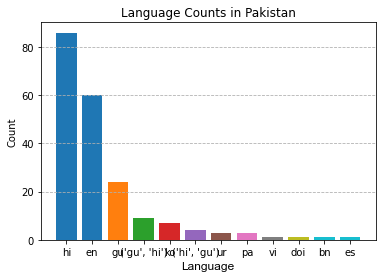

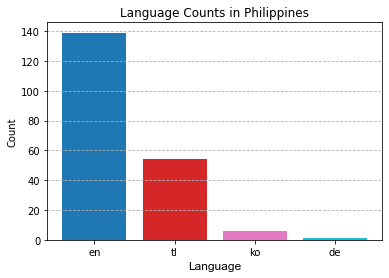

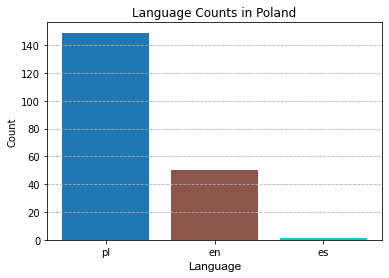

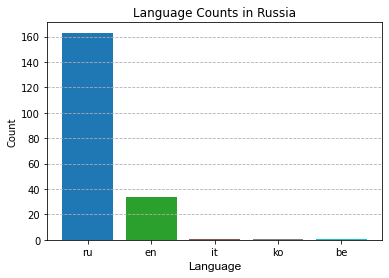

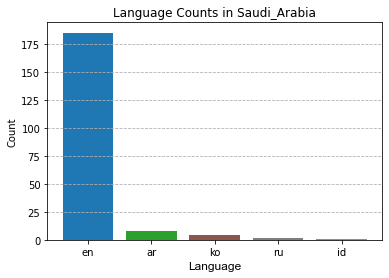

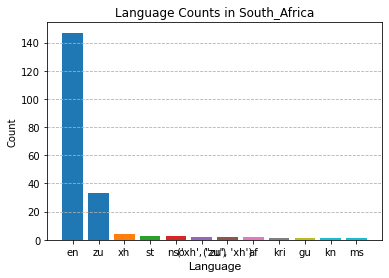

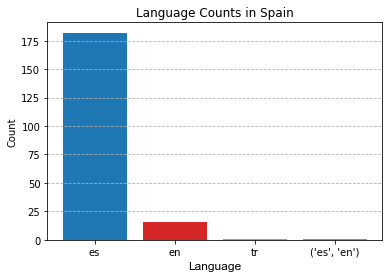

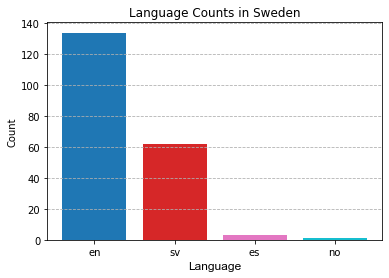

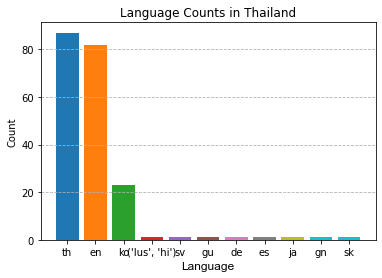

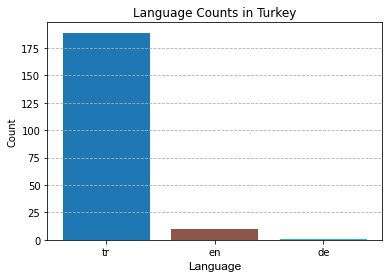

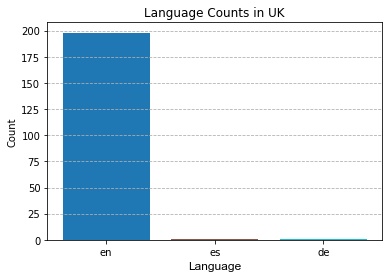

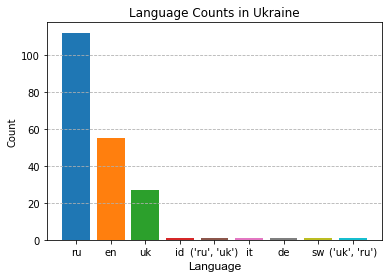

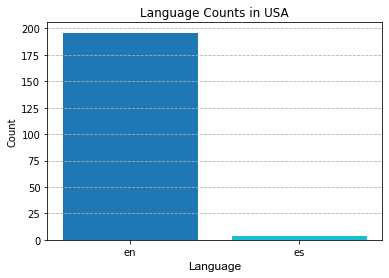

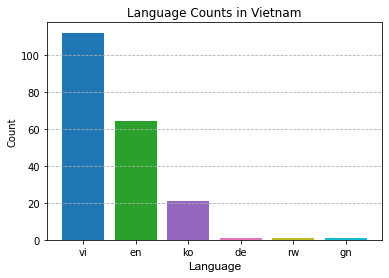

In [50]:
for index, row in data.iterrows():
    country = row['country']
    info = row['languages']

    info = ast.literal_eval(info)
    print(info)

    location = geolocator.geocode(country)
    if location is None:
        continue

    lat = location.latitude
    lon = location.longitude

    languages = list(info.keys())
    counts = list(info.values())

    fig, ax = plt.subplots()  # Create a figure and axes objects

    # Define a color palette or a set of colors
    color_palette = plt.cm.get_cmap('tab10')  # Using the 'tab10' color palette

    # Generate a list of colors based on the number of data points
    num_colors = len(info)
    colors = color_palette(np.linspace(0, 1, num_colors))

    ax.bar(languages, counts, color=colors)

    ax.set_xlabel('Language', fontname='Arial', fontsize=12)
    ax.set_ylabel('Count')
    ax.set_title(f'Language Counts in {countries_official[country]}')

    # Add grid lines
    ax.grid(axis='y', linestyle='--')

    # Convert the plot to HTML string
    buffer = io.BytesIO()
    fig.savefig(buffer, format='png')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode()
    buffer.close()
    img_html = f'<img src="data:image/png;base64,{image_base64}">'

    marker = folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(img_html, max_width=400)
    )
    marker_cluster.add_child(marker)

m.add_child(marker_cluster)

In [51]:
m.save('C:/Users/user/Downloads/TaCos_2023/map.html')

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


analyze most popular languages in the world
add legend to explain what each language is

In [177]:
top_coherence_scores = [3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 
                       3, 3, 3, 3, 4, 3, 3, 3, 6, 3, 3, 5, 6]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
top_coherence_scores = dict(zip(countries, top_coherence_scores))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import pyLDAvis
import pandas as pd

from bs4 import BeautifulSoup


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
countries[-5] = 'turkiye'

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [179]:
countries_top_topics = defaultdict()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
for el in countries:
    # Read the HTML file
    country = el.capitalize()
    num_topics = top_coherence_scores[el]
    html_file = open(f'C:/Users/user/Downloads/TaCos_2023/{country}/{country}_{num_topics}.html', 'r', encoding='utf-8').read()
    soup = BeautifulSoup(html_file, 'html.parser')

    # Extract the 'Freq' element from the script tag
    ldavis_data_script = soup.find('script', type='text/javascript', string=lambda text: 'ldavis_el' in text)
    ldavis_data = ldavis_data_script.string

    #Extract topic frequencies
    start_index = ldavis_data.index('"Freq": [') + len('"Freq": [')
    end_index = ldavis_data.index(']', start_index)
    freq_value = ldavis_data[start_index:end_index]
    freq_list = [float(value) for value in freq_value.split(',')]

    #Extract terms
    start_index = ldavis_data.index('"Term": [') + len('"Term": [')
    end_index = ldavis_data.index(']', start_index)
    term_value = ldavis_data[start_index:end_index]
    term_list = [term.strip('"" ') for term in term_value.split(',')]

    #Extract categories
    start_index = ldavis_data.index('"Category": [') + len('"Category": [')
    end_index = ldavis_data.index(']', start_index)
    cat_value = ldavis_data[start_index:end_index]
    cat_list = [cat.strip('"" ') for cat in cat_value.split(',')]

    #Extract probabilities
    start_index = ldavis_data.index('"logprob": [') + len('"logprob": [')
    end_index = ldavis_data.index(']', start_index)
    prob_value = ldavis_data[start_index:end_index]
    prob_list = [float(value) for value in prob_value.split(',')]

    # Print the 'Freq' list
    #print(freq_list)
    #print(term_list)
    #print(cat_list)
    #print(prob_list)
    if len(term_list) == len(cat_list) == len(prob_list):
        print("Yay!", country)
    else:
        print("Nay...", country)
        
    term_prob_dict = dict(zip(term_list, prob_list))
    term_topic_dict = list(zip(cat_list, term_list))
    
    top_words_per_topic = defaultdict(dict)
    for topic, word in term_topic_dict:
        try:
            top_words_per_topic[topic][word] = term_prob_dict[word]
        except:
            top_words_per_topic[topic] = {}
            top_words_per_topic[topic][word] = term_prob_dict[word]
            
    for topic in top_words_per_topic:
        top_words_per_topic[topic] = dict(sorted(top_words_per_topic[topic].items(), key=lambda x: x[1], reverse=True))
    
    countries_top_topics[el] = top_words_per_topic

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Yay! Australia
Yay! Austria
Yay! Belarus
Yay! Bolivia
Yay! Brazil
Yay! Canada
Yay! Chile
Yay! Colombia
Yay! Czech_republic
Yay! Egypt
Yay! Finland
Yay! France
Yay! Germany
Yay! Greece
Yay! Hungary
Yay! India
Yay! Indonesia
Yay! Israel
Yay! Italy
Yay! Kazakhstan
Yay! Malaysia
Yay! Mexico
Yay! Morocco
Yay! Norway
Yay! Pakistan
Yay! Philippines
Yay! Poland
Yay! Russia
Yay! Saudi_arabia
Yay! South_africa
Yay! Spain
Yay! Sweden
Yay! Thailand
Yay! Turkiye
Yay! Uk
Yay! Ukraine
Yay! Usa
Yay! Vietnam


In [182]:
import json

# Save the dictionary as a JSON file
with open('countries_top_topics.json', 'w') as json_file:
    json.dump(countries_top_topics, json_file)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [248]:
with open('countries_top_topics.json', 'r') as file:
    # Load the JSON data into a Python object
    countries_top_topics = json.load(file)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [326]:
df_countries_topics = pd.DataFrame.from_dict(countries_top_topics, orient='index')\
df_countries_topics = df_countries_topics.reset_index()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [338]:
df_countries_topics.to_csv('C:/Users/user/Downloads/TaCos_2023/df_countries_topics.csv')

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [334]:
topic_freq_dict = []
for el in countries:
    # Read the HTML file
    country = el.capitalize()
    num_topics = top_coherence_scores[el]
    html_file = open(f'C:/Users/user/Downloads/TaCos_2023/{country}/{country}_{num_topics}.html', 'r', encoding='utf-8').read()
    soup = BeautifulSoup(html_file, 'html.parser')

    # Extract the 'Freq' element from the script tag
    ldavis_data_script = soup.find('script', type='text/javascript', string=lambda text: 'ldavis_el' in text)
    ldavis_data = ldavis_data_script.string

    #Extract topic frequencies
    start_index = ldavis_data.index('"Freq": [') + len('"Freq": [')
    end_index = ldavis_data.index(']', start_index)
    freq_value = ldavis_data[start_index:end_index]
    freq_list = [float(value) for value in freq_value.split(',')]

    topic_freq_dict.append(freq_list)
    #df_countries_topics.loc[el, 'topic_proportion'] = freq_list


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [336]:
df_countries_topics['topic_proportion'] = topic_freq_dict

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [464]:
df_countries_topics

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,Default,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,topic_proportion
0,australia,"{'time': -4.5036, 'bitch': -4.682, 'shit': -4....","{'time': -4.5036, 'way': -4.6613, 'right': -4....","{'time': -4.5036, 'way': -4.6613, 'right': -4....","{'bitch': -4.682, 'shit': -4.7974, 'nigga': -4...",NaN,NaN,NaN,"[35.86539578946563, 34.44475984961187, 29.6898..."
1,austria,"{'heart': -4.7633, 'eye': -4.7841, 'light': -4...","{'heart': -4.7633, 'time': -4.8152, 'around': ...","{'time': -4.8152, 'bitch': -5.0167, 'fuck': -5...","{'heart': -4.7633, 'eye': -4.7841, 'light': -4...",NaN,NaN,NaN,"[41.999546383096046, 41.410171397422175, 16.59..."
2,belarus,"{'believe': -4.9505, 'eye': -5.0253, 'man': -5...","{'love': -4.6418, 'eye': -5.0253, 'bitch': -5....","{'love': -4.6418, 'fucking': -5.0271, 'right':...","{'love': -4.6418, 'believe': -4.9505, 'eye': -...",NaN,NaN,NaN,"[47.56281676139067, 27.691475852686477, 24.745..."
3,bolivia,"{'yankee': 6.0, 'bizarrap': 3.0, 'lenny': 2.0,...","{'left': -5.0543, 'crazy': -5.0872, 'mommy': -...","{'left': -5.0543, 'mommy': -5.0955, 'doe': -5....","{'bad': -5.1505, 'nasty': -5.8345, 'black': -5...","{'music': -5.0701, 'bad': -5.1505, 'sech': -5....",NaN,NaN,"[41.30355014777504, 33.19501284667028, 15.1204..."
4,brazil,"{'call': -4.3337, 'car': -4.7013, 'heart': -4....","{'call': -4.3337, 'leave': -4.7407, 'heart': -...","{'call': -4.3337, 'heart': -4.7932, 'sit': -4....","{'car': -4.7013, 'money': -4.9888, 'part': -5....",NaN,NaN,NaN,"[48.778611509753404, 31.622738965850335, 19.59..."
5,canada,"{'love': -4.3426, 'time': -4.5274, 'nigga': -4...","{'time': -4.5274, 'nigga': -4.5971, 'bitch': -...","{'love': -4.3426, 'time': -4.5274, 'girl': -4....","{'love': -4.3426, 'time': -4.5274, 'thing': -4...","{'love': -4.3426, 'thing': -4.9001, 'night': -...",NaN,NaN,"[42.65930158543219, 30.35528168042056, 13.4954..."
6,chile,"{'black': 5.0, 'mommy': -4.9155, 'prr': -5.298...","{'mommy': -4.9155, 'kiss': -5.0131, 'night': -...","{'mommy': -4.9155, 'prr': -5.298, 'eat': -5.39...","{'remix': -5.5964, 'bad': -5.7521, 'balvin': -...",NaN,NaN,NaN,"[58.477900964631324, 26.700038617184557, 14.82..."
7,colombia,"{'karol': 17.0, 'turizo': 15.0, 'look': -4.902...","{'look': -4.902, 'mommy': -5.1518, 'today': -5...","{'look': -4.902, 'haha': -5.0105, 'mommy': -5....","{'chris': -5.6221, 'balvin': -5.6549, 'flow': ...",NaN,NaN,NaN,"[60.905278232716576, 28.05765390250872, 11.037..."
8,czech_republic,"{'long': -4.9631, 'people': -5.0382, 'morning'...","{'time': -4.6794, 'back': -4.7761, 'night': -4...","{'time': -4.6794, 'back': -4.7761, 'night': -4...","{'time': -4.6794, 'night': -4.891, 'long': -4....",NaN,NaN,NaN,"[34.951327588567395, 32.974466348164036, 32.07..."
9,egypt,"{'long': 19.0, 'head': 18.0, 'brother': 17.0, ...","{'world': -5.2042, 'back': -5.2428, 'eye': -5....","{'saint': -7.1961, 'cardi': -7.2154, 'dogg': -...","{'eloquent': -5.3379, 'combat': -5.3399, 'draw...",NaN,NaN,NaN,"[53.38844467568593, 42.31015159790818, 4.30140..."


In [465]:
df_countries_topics.iloc[13]['topic_proportion']

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[47.86289725640479, 23.977673964028153, 15.230971502058892, 12.928457277508166]

In [331]:
df_countries_topics['index']

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0          australia
1            austria
2            belarus
3            bolivia
4             brazil
5             canada
6              chile
7           colombia
8     czech_republic
9              egypt
10           finland
11            france
12           germany
13            greece
14           hungary
15             india
16         indonesia
17            israel
18             italy
19        kazakhstan
20          malaysia
21            mexico
22           morocco
23            norway
24          pakistan
25       philippines
26            poland
27            russia
28      saudi_arabia
29      south_africa
30             spain
31            sweden
32          thailand
33           turkiye
34                uk
35           ukraine
36               usa
37           vietnam
Name: index, dtype: object

In [347]:
df_countries_topics

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,Default,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,topic_proportion
0,australia,"{'time': -4.5036, 'bitch': -4.682, 'shit': -4....","{'time': -4.5036, 'way': -4.6613, 'right': -4....","{'time': -4.5036, 'way': -4.6613, 'right': -4....","{'bitch': -4.682, 'shit': -4.7974, 'nigga': -4...",NaN,NaN,NaN,"[35.86539578946563, 34.44475984961187, 29.6898..."
1,austria,"{'heart': -4.7633, 'eye': -4.7841, 'light': -4...","{'heart': -4.7633, 'time': -4.8152, 'around': ...","{'time': -4.8152, 'bitch': -5.0167, 'fuck': -5...","{'heart': -4.7633, 'eye': -4.7841, 'light': -4...",NaN,NaN,NaN,"[41.999546383096046, 41.410171397422175, 16.59..."
2,belarus,"{'believe': -4.9505, 'eye': -5.0253, 'man': -5...","{'love': -4.6418, 'eye': -5.0253, 'bitch': -5....","{'love': -4.6418, 'fucking': -5.0271, 'right':...","{'love': -4.6418, 'believe': -4.9505, 'eye': -...",NaN,NaN,NaN,"[47.56281676139067, 27.691475852686477, 24.745..."
3,bolivia,"{'yankee': 6.0, 'bizarrap': 3.0, 'lenny': 2.0,...","{'left': -5.0543, 'crazy': -5.0872, 'mommy': -...","{'left': -5.0543, 'mommy': -5.0955, 'doe': -5....","{'bad': -5.1505, 'nasty': -5.8345, 'black': -5...","{'music': -5.0701, 'bad': -5.1505, 'sech': -5....",NaN,NaN,"[41.30355014777504, 33.19501284667028, 15.1204..."
4,brazil,"{'call': -4.3337, 'car': -4.7013, 'heart': -4....","{'call': -4.3337, 'leave': -4.7407, 'heart': -...","{'call': -4.3337, 'heart': -4.7932, 'sit': -4....","{'car': -4.7013, 'money': -4.9888, 'part': -5....",NaN,NaN,NaN,"[48.778611509753404, 31.622738965850335, 19.59..."
5,canada,"{'love': -4.3426, 'time': -4.5274, 'nigga': -4...","{'time': -4.5274, 'nigga': -4.5971, 'bitch': -...","{'love': -4.3426, 'time': -4.5274, 'girl': -4....","{'love': -4.3426, 'time': -4.5274, 'thing': -4...","{'love': -4.3426, 'thing': -4.9001, 'night': -...",NaN,NaN,"[42.65930158543219, 30.35528168042056, 13.4954..."
6,chile,"{'black': 5.0, 'mommy': -4.9155, 'prr': -5.298...","{'mommy': -4.9155, 'kiss': -5.0131, 'night': -...","{'mommy': -4.9155, 'prr': -5.298, 'eat': -5.39...","{'remix': -5.5964, 'bad': -5.7521, 'balvin': -...",NaN,NaN,NaN,"[58.477900964631324, 26.700038617184557, 14.82..."
7,colombia,"{'karol': 17.0, 'turizo': 15.0, 'look': -4.902...","{'look': -4.902, 'mommy': -5.1518, 'today': -5...","{'look': -4.902, 'haha': -5.0105, 'mommy': -5....","{'chris': -5.6221, 'balvin': -5.6549, 'flow': ...",NaN,NaN,NaN,"[60.905278232716576, 28.05765390250872, 11.037..."
8,czech_republic,"{'long': -4.9631, 'people': -5.0382, 'morning'...","{'time': -4.6794, 'back': -4.7761, 'night': -4...","{'time': -4.6794, 'back': -4.7761, 'night': -4...","{'time': -4.6794, 'night': -4.891, 'long': -4....",NaN,NaN,NaN,"[34.951327588567395, 32.974466348164036, 32.07..."
9,egypt,"{'long': 19.0, 'head': 18.0, 'brother': 17.0, ...","{'world': -5.2042, 'back': -5.2428, 'eye': -5....","{'saint': -7.1961, 'cardi': -7.2154, 'dogg': -...","{'eloquent': -5.3379, 'combat': -5.3399, 'draw...",NaN,NaN,NaN,"[53.38844467568593, 42.31015159790818, 4.30140..."


In [ ]:
#show topics N1 
#add qualitative analysis

In [294]:
for country in countries_top_topics:
    print(country)
    for topic in countries_top_topics[country]:
        print(topic, ":", list(countries_top_topics[country][topic].keys()))

australia
Default : ['time', 'bitch', 'shit', 'right', 'nigga', 'ayy', 'fuck', 'someone', 'heart', 'mine', 'money', 'night', 'stop', 'lost', 'home', 'away', 'wish', 'big', 'maybe', 'god', 'top', 'dream', 'forever', 'alright', 'else', 'reason', 'sweet', 'understand', 'buy', 'weve']
Topic1 : ['time', 'way', 'right', 'back', 'girl', 'mind', 'heart', 'hold', 'stay', 'life', 'night', 'stop', 'home', 'leave', 'fall', 'left', 'away', 'light', 'world', 'man', 'change', 'hard', 'inside', 'head', 'well', 'dream', 'hand', 'eye', 'keep', 'alright', 'look', 'thing', 'start', 'people', 'touch', 'round', 'fast', 'understand', 'running', 'bit', 'i\\u2019m', 'town', 'fill', 'making', 'sun', 'across', 'started', 'help', 'rise', 'can\\u2019t', 'raw', 'leg', 'country', 'raised', 'hurry', 'case', 'rhythm', 'lady', 'step', 'cigarette', 'raise', 'bone', 'mention', 'clock', 'along', 'sold', 'haha', 'shadow', 'giving', 'fade', 'anywhere', 'seek', 'born']
Topic2 : ['time', 'way', 'right', 'back', 'someone', 'he

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [477]:
topics_names_dict = {1: "Emotions and relationships", 2: "Urban lifestyle and hip-hop culture", 
                     3: "Sensual, bodily love", 4: "Feelings, existential themes, personal reflection",
                     5: "Love and heartbreak, unhappy love", 6: "Music and artist names", 
                    7: "Politics and religion", 8: "Violence and conflict", 9: "Untranslated"}

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [344]:
countries_topic_names = defaultdict()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [406]:
countries_topic_names['austria'] = [1, 2, 4]
countries_topic_names['australia'] = [4, 5, 2]
countries_topic_names['belarus'] = [1, 2, 4]
countries_topic_names['bolivia'] = [1, 2, 6, 6]
countries_topic_names['brazil'] = [1, 2, 6, 6]
countries_topic_names['canada'] = [2, 5, 4, 1]
countries_topic_names['chile'] = [1, 2, 6]
countries_topic_names['colombia'] = [4, 2, 6]
countries_topic_names['czech_republic'] = [5, 2, 4]
countries_topic_names['egypt'] = [4, 6, 7]
countries_topic_names['finland'] = [4, 2, 6]
countries_topic_names['france'] = [1, 2, 4]
countries_topic_names['germany'] = [2, 5, 1]
countries_topic_names['greece'] = [2, 4, 8, 6]
countries_topic_names['hungary'] = [1, 2, 6]
countries_topic_names['india'] = [1, 9, 4, 9]
countries_topic_names['indonesia'] = [1, 1, 4]
countries_topic_names['israel'] = [1, 2, 5]
countries_topic_names['italy'] = [2, 1, 6]
countries_topic_names['kazakhstan'] = [1, 5, 2]
countries_topic_names['malaysia'] = [4, 1, 4, 4]
countries_topic_names['mexico'] = [4, 3, 6, 2]
countries_topic_names['morocco'] = [9]
countries_topic_names['norway'] = [1, 2, 4]
countries_topic_names['pakistan'] = [9, 1, 1]
countries_topic_names['philippines'] = [1]
countries_topic_names['poland'] = [1]
countries_topic_names['russia'] = [2, 2, 1]
countries_topic_names['saudi_arabia'] = [1, 2, 6]
countries_topic_names['south_africa'] = [1, 2, 2, 6]
countries_topic_names['spain'] = [3, 6, 2]
countries_topic_names['sweden'] = [1, 2, 4]
countries_topic_names['thailand'] = [1, 2, 4]
countries_topic_names['turkiye'] = [1, 2, 1]
countries_topic_names['uk'] = [1, 2, 4]
countries_topic_names['ukraine'] = [4, 2, 2]
countries_topic_names['usa'] = [1, 2, 2, 2, 2]
countries_topic_names['vietnam'] = [4, 2, 5, 4]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [467]:
top_topic_list = []
for country in countries:
    top_topic_list.append(countries_topic_names[country][0])

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [468]:
top_topic_list

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[4,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 5,
 4,
 4,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 4,
 9,
 1,
 9,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 4,
 1,
 4]

In [469]:
df['top_topic'] = top_topic_list

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [463]:
countries_top_topics["greece"]['Topic3'].keys()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['van', 'metal', 'moon', 'king', 'avenue', 'misery', 'space', 'poison', 'grave', 'twisted', 'violent', 'blood', 'grey', 'crisis', 'lock', 'count', 'flame', 'fight', 'general', 'bright', 'nation', 'monkey', 'ivy', 'quartet', 'spark', 'vital', 'distant', 'hollow', 'smash', 'neck', 'swallow', 'veil', 'agent', 'chamber', 'college', 'dread', 'feared', 'flesh', 'grin', 'hostile', 'lake', 'led', 'roman', 'skull', 'strike', 'sword', 'terror', 'testament', 'warning', 'hail'])

In [451]:
topic4_total.update(countries_top_topics["vietnam"]['Topic1'].keys())

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [452]:
topic4_total = dict(sorted(topic4_total.items(), key=lambda x: x[1], reverse=True))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [455]:
topic4_total.keys()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['night', 'life', 'time', 'look', 'way', 'back', 'right', 'heart', 'eye', 'world', 'away', 'well', 'thing', 'love', 'keep', 'hand', 'little', 'girl', 'fall', 'mind', 'alone', 'around', 'good', 'hold', 'head', 'leave', 'left', 'forget', 'word', 'made', 'someone', 'light', 'song', 'two', 'stay', 'stop', 'people', 'hurt', 'call', 'long', 'better', 'end', 'mine', 'live', 'home', 'sun', 'find', 'looking', 'friend', 'else', 'maybe', 'mean', 'face', 'dark', 'tear', 'man', 'change', 'fuck', 'god', 'sleep', 'hear', 'five', 'lost', 'doe', 'together', 'thousand', 'name', 'may', 'next', 'run', 'year', 'contributor', 'place', 'thought', 'pain', 'reason', 'forever', 'round', 'dream', 'hope', 'inside', 'share', 'giving', 'learn', 'breathe', 'bone', 'carry', 'hard', 'start', 'money', 'new', 'big', 'late', 'hit', 'show', 'mmm', 'wish', 'low', 'dance', 'minute', 'far', 'blonde', 'today', 'told', 'turn', 'anyone', 'last', 'moment', 'please', 'found', 'floor', 'many', 'circle', 'easy', 'second',

In [429]:
topic4_total = Counter()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [354]:
topic1_total.update(countries_top_topics["austria"]['Topic1'].keys())

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [250]:
countries_words_total = Counter()
for country in countries_top_topics:
    for topic in countries_top_topics[country]:
        countries_words_total.update(countries_top_topics[country][topic].keys())

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [252]:
countries_words_total = dict(sorted(dict(countries_words_total).items(), key=lambda x: x[1], reverse=True))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [256]:
len(countries_words_total)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2554

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


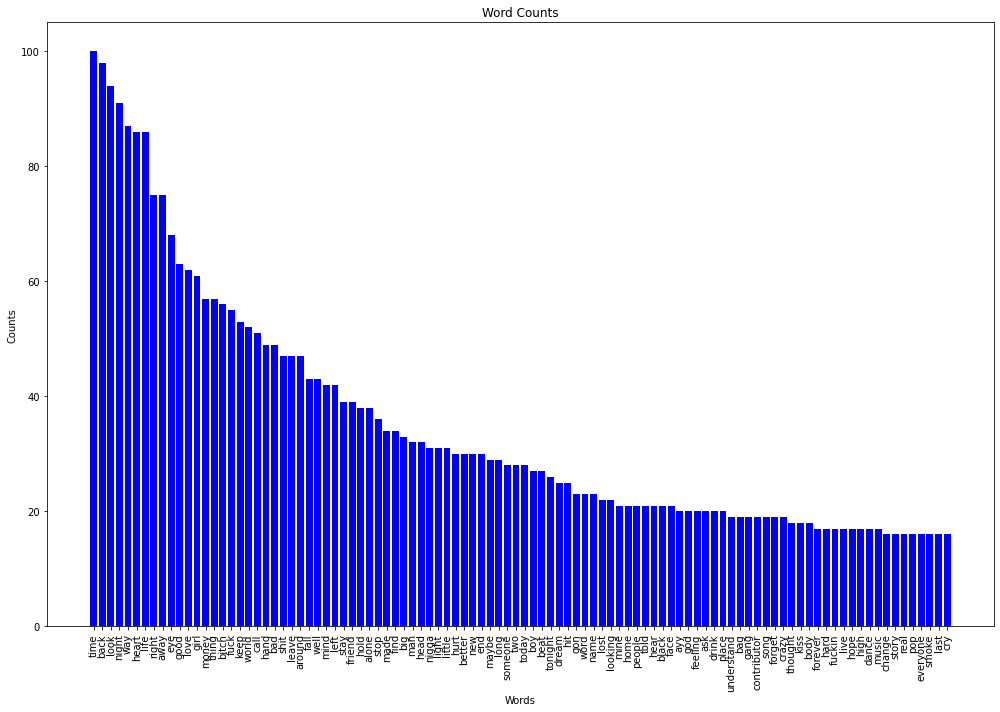

In [273]:
words = list(countries_words_total.keys())[:100]
counts = list(countries_words_total.values())[:100]

# Set up the bar plot
plt.figure(figsize=(14, 10))  # Set the size of the plot
plt.bar(words, counts, color='blue')  # Create the bar plot

# Customize the plot
plt.xlabel('Words')  # X-axis label
plt.ylabel('Counts')  # Y-axis label
plt.title('Word Counts')  # Title of the plot
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better visibility

plt.savefig('C:/Users/user/Downloads/TaCos_2023/word_counts_top_100.png', dpi=300)  # Specify the filename and DPI (optional)

# Display the plot
plt.tight_layout()  # Adjust the layout
plt.show()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


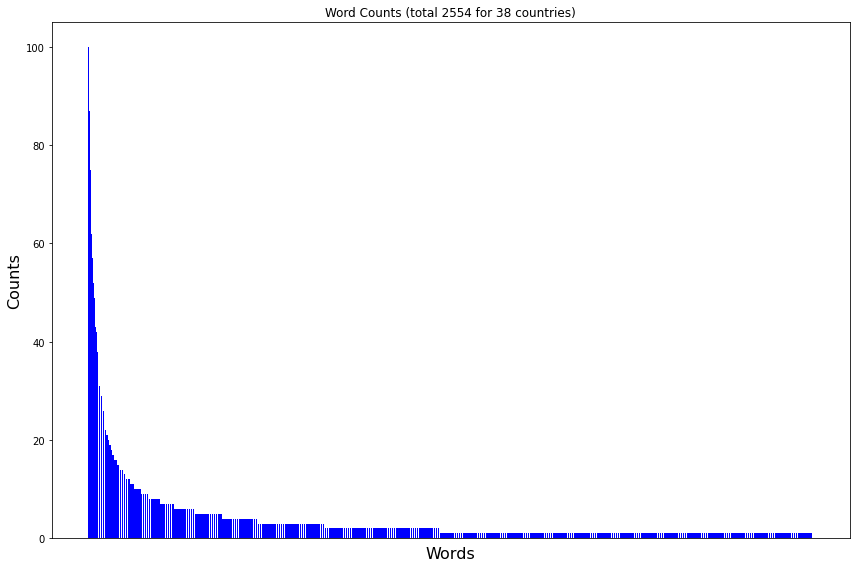

In [272]:
words = countries_words_total.keys()
counts = countries_words_total.values()

# Set up the bar plot
plt.figure(figsize=(12, 8))  # Set the size of the plot
plt.bar(words, counts, color='blue')  # Create the bar plot

# Customize the plot
plt.xlabel('Words', fontsize=16)  # X-axis label
plt.ylabel('Counts', fontsize=16)  # Y-axis label
plt.title('Word Counts (total 2554 for 38 countries)')  # Title of the plot
plt.xticks([])  # Rotate x-axis labels for better visibility

plt.savefig('C:/Users/user/Downloads/TaCos_2023/word_counts.png', dpi=300)  # Specify the filename and DPI (optional)

# Display the plot
plt.tight_layout()  # Adjust the layout
plt.show()

In [271]:
countries_words_total

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'time': 100,
 'back': 98,
 'look': 94,
 'night': 91,
 'way': 87,
 'heart': 86,
 'life': 86,
 'right': 75,
 'away': 75,
 'eye': 68,
 'good': 63,
 'love': 62,
 'girl': 61,
 'money': 57,
 'thing': 57,
 'bitch': 56,
 'fuck': 55,
 'keep': 53,
 'world': 52,
 'call': 51,
 'hand': 49,
 'bad': 49,
 'shit': 47,
 'leave': 47,
 'around': 47,
 'fall': 43,
 'well': 43,
 'mind': 42,
 'left': 42,
 'stay': 39,
 'friend': 39,
 'hold': 38,
 'alone': 38,
 'stop': 36,
 'made': 34,
 'find': 34,
 'big': 33,
 'man': 32,
 'head': 32,
 'nigga': 31,
 'light': 31,
 'little': 31,
 'hurt': 30,
 'better': 30,
 'new': 30,
 'end': 30,
 'maybe': 29,
 'long': 29,
 'someone': 28,
 'two': 28,
 'today': 28,
 'boy': 27,
 'beat': 27,
 'tonight': 26,
 'dream': 25,
 'hit': 25,
 'gon': 23,
 'word': 23,
 'name': 23,
 'lost': 22,
 'looking': 22,
 'mine': 21,
 'home': 21,
 'people': 21,
 'told': 21,
 'hear': 21,
 'black': 21,
 'face': 21,
 'ayy': 20,
 'god': 20,
 'feeling': 20,
 'ask': 20,
 'drink': 20,
 'place': 20,
 'understand

In [202]:
countries_topics_unique = defaultdict()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
australia_test = defaultdict()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [284]:
austria_dict_test = countries_top_topics['austria'].copy()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [285]:
# Step 2: Create an empty Counter object
word_counts = Counter()

# Step 3: Iterate over each topic and update the Counter object

for topic in austria_dict_test:
    word_counts.update(austria_dict_test[topic].keys())

repeating = {key: value for key, value in sorted(word_counts.items(), key=lambda x: x[1], reverse=True) if value > 1}

for topic in austria_dict_test:
    austria_dict_test[topic] = [word for word in austria_dict_test[topic] if word not in repeating]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [281]:
austria_dict_test

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Default': ['eye',
  'light',
  'mind',
  'bitch',
  'dark',
  'made',
  'world',
  'hit',
  'tonight',
  'round',
  'mine',
  'live',
  'little',
  'three',
  'hope',
  'inside',
  'contributor',
  'glass',
  'bad',
  'money',
  'took',
  'tear',
  'roll',
  'thought'],
 'Topic1': ['around',
  'mind',
  'away',
  'thing',
  'made',
  'girl',
  'leave',
  'long',
  'hand',
  'end',
  'better',
  'keep',
  'friend',
  'hear',
  'left',
  'way',
  'alone',
  'good',
  'run',
  'took',
  'stay',
  'feeling',
  'care',
  'call',
  'hurt',
  'room',
  'thought',
  'man',
  'back',
  'lose',
  'maybe',
  'word',
  'feelin',
  'together',
  'gon',
  'falling',
  'ima',
  'fuckin',
  'seen',
  'reason',
  'singing',
  'kinda',
  'trying',
  'somethin',
  'lover',
  'doin',
  'comin',
  'livin',
  'foot',
  'swear',
  'near',
  'started',
  'ridin',
  'story',
  'probably',
  'holiday',
  'felt',
  'gettin',
  'taking'],
 'Topic2': ['bitch',
  'fuck',
  'today',
  'look',
  'hit',
  'two',
  '

In [286]:
repeating

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'time': 4,
 'love': 4,
 'heart': 3,
 'well': 3,
 'right': 3,
 'hold': 3,
 'night': 3,
 'life': 3,
 'eye': 2,
 'light': 2,
 'mind': 2,
 'bitch': 2,
 'dark': 2,
 'made': 2,
 'world': 2,
 'hit': 2,
 'tonight': 2,
 'round': 2,
 'mine': 2,
 'live': 2,
 'little': 2,
 'three': 2,
 'hope': 2,
 'inside': 2,
 'contributor': 2,
 'glass': 2,
 'bad': 2,
 'money': 2,
 'took': 2,
 'tear': 2,
 'roll': 2,
 'thought': 2,
 'hand': 2,
 'way': 2,
 'stay': 2,
 'call': 2,
 'man': 2,
 'back': 2,
 'look': 2,
 'two': 2}

In [217]:
australia_test

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defaultdict(None,
            {'Default': ['heart',
              'eye',
              'light',
              'time',
              'mind',
              'bitch',
              'dark',
              'well',
              'right',
              'made',
              'world',
              'hit',
              'tonight',
              'round',
              'hold',
              'mine',
              'live',
              'little',
              'love',
              'three',
              'hope',
              'inside',
              'contributor',
              'glass',
              'bad',
              'money',
              'took',
              'tear',
              'roll',
              'thought'],
             'Topic1': ['heart',
              'time',
              'around',
              'mind',
              'away',
              'thing',
              'well',
              'right',
              'made',
              'night',
              'life',
              'girl',
       

In [205]:
for country in countries_top_topics:
    for topic in countries_top_topics[country]:
        temp_dict = countries_top_topics[country]
        del temp_dict[topic]
        other_topics = set([word for cat in temp_dict for word in cat])
        for word in countries_top_topics[country][topic]:
            try:
                if word not in other_topics:
                    countries_topics_unique[country][topic].append(word)
            except:
                countries_topics_unique[country][topic] = []
                if word not in other_topics:
                    countries_topics_unique[country][topic].append(word)
                

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuntimeError: dictionary keys changed during iteration

In [186]:
# Read the HTML file
html_file = open('C:/Users/user/Downloads/TaCos_2023/Germany/Germany_3.html', 'r', encoding='utf-8').read()
soup = BeautifulSoup(html_file, 'html.parser')

# Extract the 'Freq' element from the script tag
ldavis_data_script = soup.find('script', type='text/javascript', string=lambda text: 'ldavis_el' in text)
ldavis_data = ldavis_data_script.string

#Extract topic frequencies
start_index = ldavis_data.index('"Freq": [') + len('"Freq": [')
end_index = ldavis_data.index(']', start_index)
freq_value = ldavis_data[start_index:end_index]
freq_list = [float(value) for value in freq_value.split(',')]

#Extract terms
start_index = ldavis_data.index('"Term": [') + len('"Term": [')
end_index = ldavis_data.index(']', start_index)
term_value = ldavis_data[start_index:end_index]
term_list = [term.strip('"" ') for term in term_value.split(',')]

#Extract categories
start_index = ldavis_data.index('"Category": [') + len('"Category": [')
end_index = ldavis_data.index(']', start_index)
cat_value = ldavis_data[start_index:end_index]
cat_list = [cat.strip('"" ') for cat in cat_value.split(',')]

#Extract probabilities
start_index = ldavis_data.index('"loglift": [') + len('"loglift": [')
end_index = ldavis_data.index(']', start_index)
loglift_value = ldavis_data[start_index:end_index]
loglift_list = [float(value) for value in loglift_value.split(',')]

# Print the 'Freq' list
#print(freq_list)
#print(term_list)
#print(cat_list)
#print(prob_list)
if len(term_list) == len(cat_list) == len(loglift_list):
    print("Yay!")

Yay!


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
term_prob_dict = dict(zip(term_list, loglift_list))
term_topic_dict = list(zip(cat_list, term_list))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
top_words_per_topic = defaultdict(dict)
for topic, word in term_topic_dict:
    try:
        top_words_per_topic[topic][word] = term_prob_dict[word]
    except:
        top_words_per_topic[topic] = {}
        top_words_per_topic[topic][word] = term_prob_dict[word]

        
for topic in top_words_per_topic:
    print(len(top_words_per_topic[topic]))
    
    
for topic in top_words_per_topic:
    top_words_per_topic[topic] = dict(sorted(top_words_per_topic[topic].items(), key=lambda x: x[1], reverse=True))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
loglift_list

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[30.0,
 29.0,
 28.0,
 27.0,
 26.0,
 25.0,
 24.0,
 23.0,
 22.0,
 21.0,
 20.0,
 19.0,
 18.0,
 17.0,
 16.0,
 15.0,
 14.0,
 13.0,
 12.0,
 11.0,
 10.0,
 9.0,
 8.0,
 7.0,
 6.0,
 5.0,
 4.0,
 3.0,
 2.0,
 1.0,
 0.7914,
 0.7778,
 0.7765,
 0.7722,
 0.7704,
 0.7684,
 0.7657,
 0.763,
 0.7623,
 0.7612,
 0.7608,
 0.7592,
 0.756,
 0.7551,
 0.7544,
 0.7532,
 0.7517,
 0.751,
 0.7472,
 0.7468,
 0.7466,
 0.7461,
 0.7459,
 0.7458,
 0.7458,
 0.7457,
 0.7457,
 0.7456,
 0.745,
 0.7447,
 0.6849,
 0.6995,
 0.6659,
 0.6652,
 0.5763,
 0.6003,
 0.6498,
 0.6476,
 0.5695,
 0.6419,
 0.5132,
 0.444,
 0.4366,
 0.5375,
 0.5975,
 0.4565,
 0.5862,
 0.3277,
 0.5775,
 0.535,
 0.4697,
 0.2363,
 0.4301,
 0.3075,
 0.2973,
 0.4684,
 0.352,
 0.174,
 0.2787,
 -0.1336,
 -0.016,
 0.0861,
 -0.2656,
 -0.0188,
 0.277,
 -0.4586,
 -0.0828,
 -0.8556,
 -0.2295,
 1.0756,
 1.053,
 1.0448,
 1.0268,
 1.0244,
 1.0227,
 1.0211,
 1.0193,
 1.0191,
 1.0182,
 1.0083,
 1.008,
 0.996,
 0.9912,
 0.9854,
 0.9797,
 0.9788,
 0.9709,
 0.9697,
 0.9689,
 0.

In [190]:
for topic in top_words_per_topic:
    print(len(top_words_per_topic[topic]))

30
69
68
70


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
for topic in top_words_per_topic:
    top_words_per_topic[topic] = dict(sorted(top_words_per_topic[topic].items(), key=lambda x: x[1], reverse=True))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 relevance(term w | topic t) = λ * p(w | t) + (1 - λ) * p(w | t)/p(w);
 
 (1 - λ) * p(w | t)/p(w) = loglift. when alpa is 0 we see these words.

In [192]:
top_words_per_topic

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


defaultdict(dict,
            {'Default': {'someone': 2.0,
              'drunk': 1.3877,
              'though': 1.3836,
              'sip': 1.3521,
              'hope': 1.0756,
              'round': 1.053,
              'mama': 1.0397,
              'mean': 1.036,
              'mine': 1.0182,
              'miss': 0.9865,
              'face': 0.967,
              'morning': 0.9566,
              'tonight': 0.9229,
              'stand': 0.8607,
              'long': 0.7967,
              'whole': 0.7914,
              'mind': 0.7662,
              'black': 0.7472,
              'friend': 0.7249,
              'hold': 0.7118,
              'alone': 0.6357,
              'leave': 0.5656,
              'away': 0.5412,
              'bitch': 0.295,
              'way': 0.264,
              'time': 0.2023,
              'love': 0.182,
              'fuck': 0.1593,
              'night': 0.0098,
              'heart': -0.068},
             'Topic1': {'whole': 0.7914,
              'pa

1. saliency(term w) = frequency(w) * [sum_t p(t | w) * log(p(t | w)/p(t))] for topics t; see Chuang et. al (2012)


maybe divide term frequency in the topic by the overall term frequency

In [195]:
term_freq_topic = [45.0, 82.0, 16.0, 11.0, 25.0, 11.0, 67.0, 26.0, 34.0, 17.0, 20.0, 16.0, 18.0, 32.0, 29.0, 29.0, 19.0, 55.0, 14.0, 20.0, 14.0, 13.0, 35.0, 10.0, 19.0, 7.0, 61.0, 25.0, 16.0, 35.0, 17.48837354413151, 11.206290604457674, 11.191545882396204, 10.28411553098212, 9.410259219720723, 9.39094881553975, 10.21344120295674, 8.488582230023324, 8.482649521691597, 8.472052235598788, 11.86235192872877, 8.45451783231448, 7.583506315992842, 7.577180600502137, 7.571155692587897, 7.562094379428342, 7.549529997214779, 7.543964026887235, 19.182515633807196, 6.676923788672701, 6.675720558366839, 6.6719068951885, 6.670502268029217, 6.670203520778618, 6.670146861817297, 6.669447381185722, 6.669460258222386, 6.668379102224097, 6.664739021499985, 6.661972003861676, 16.431082300350457, 11.8955849849506, 15.331584251037333, 14.605054631327478, 22.297895229899105, 17.952939941094368, 12.834667092484205, 12.758660641117098, 18.705410093622632, 11.19130894492159, 19.6327112578533, 24.260891302181296, 23.434954049916016, 16.10571666972284, 12.103457442569274, 16.707338003631293, 11.959257295519693, 21.625874621468412, 11.909230523162455, 12.79126323762387, 13.759416543129579, 18.632390084598583, 14.36513380486004, 15.95643369876134, 15.709803421110617, 13.15244042229487, 14.383588143643607, 16.240469192512954, 14.982620678101178, 19.62346657569165, 17.968421229653007, 15.67620568721047, 18.057194490250033, 16.045574727525484, 13.884421664246693, 17.03224521175368, 14.243546764354955, 15.19914753452083, 14.24001021500562, 16.275339424909653, 10.04744646519768, 8.304037432949054, 6.523015180233863, 6.506816910715459, 6.4960706090920075, 6.484826167972101, 6.475200777281048, 6.472060130058268, 14.573441758524632, 5.602359431503093, 5.601005951935951, 4.742815653623888, 4.720063141829832, 4.692714390473004, 4.663040341030228, 7.003735713034415, 3.8536269459139363, 3.849047789856888, 3.845987901024804, 3.8449011571038545, 3.844502800811288, 3.8337937722912345, 3.8316723114894953, 3.83153331387474, 3.831057693544921, 3.826982500906734, 3.8201424981716974, 3.7886882697801707, 3.785429591063297, 9.791916045714396, 16.80513465747167, 10.34480973106138, 10.289896354957211, 9.510226119829579, 7.354845240952135, 11.269147751798684, 21.402629081391936, 32.045336326132386, 12.974069975219859, 8.219972607372666, 18.74097229819665, 17.622145553497262, 23.53065460846716, 43.649711381186286, 14.403271404960817, 15.3746954500887, 20.22318850533744, 30.354696690019555, 34.9114733545694, 23.357940365596427, 22.50111868904976, 23.740430740483355, 13.605344337875026, 12.408105854947959, 17.073642329121373, 17.63602978451304, 11.049248089594977, 25.809209116661396, 19.45856806222976, 21.36563552626937, 13.800003120371363, 15.933888289909955, 16.473132254183376, 18.53589102416263, 16.338341840974188, 13.934346256339774, 13.952919133153829, 11.307649304709814, 11.262730736202023, 7.027443452775849, 5.356154432946695, 5.3455022227744315, 4.526199399991134, 5.943979046466038, 3.6871438831407626, 5.15829314549891, 4.420385343154459, 3.679863607659898, 3.678648181771714, 3.6681796111481138, 3.667001303892106, 3.6525188974191694, 3.6310358611002607, 3.6093850932179086, 2.8388134527330973, 2.832689157511442, 2.8277521003445134, 2.827549761936033, 2.826132276726828, 2.8241778272446347, 2.8226523351884203, 2.821212802069878, 4.23335906816522, 2.820498896347266, 2.8194545510720457, 4.926089029751565, 2.815200420919672, 4.166948532539802, 5.8023985361964785, 11.50184170840879, 9.843730640264656, 5.114756059917988, 5.633940787181646, 11.867444048274194, 9.384590463664424, 4.44666449747301, 5.883041415930697, 8.518302987907154, 6.772353607135769, 10.7458975998761, 12.819189220625145, 12.366125336203451, 14.256805566492574, 8.117849880565036, 12.293707722089566, 23.24378124228281, 12.37797092435456, 19.010328121643578, 13.605070482814254, 19.639790909666186, 8.346183611417471, 11.85619124188807, 8.434175980322628, 14.638253375985427, 6.966556616158223, 13.32677228217771, 11.020809911448247, 10.86172224481456, 13.29128463711734, 11.604650830563932, 11.545029934664745, 9.04546961652605, 9.888804381400192, 9.489010478638532, 10.126311158887031, 8.97844006491441, 9.293700608749823]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
term_total_freq = [45.0, 82.0, 16.0, 11.0, 25.0, 11.0, 67.0, 26.0, 34.0, 17.0, 20.0, 16.0, 18.0, 32.0, 29.0, 29.0, 19.0, 55.0, 14.0, 20.0, 14.0, 13.0, 35.0, 10.0, 19.0, 7.0, 61.0, 25.0, 16.0, 35.0, 18.194199894546657, 11.819007549047837, 11.818550311996448, 10.90727507697817, 9.99773388219599, 9.99723754640258, 10.902680399892175, 9.08558560533588, 9.085782006401216, 9.084987362217868, 12.72445349493351, 9.083820265226576, 8.17452445873878, 8.174381185202572, 8.173868117651978, 8.174168206354269, 8.172963735542577, 8.172462422559859, 20.858986634187605, 7.26346008627424, 7.26359525955341, 7.263428591754461, 7.26330394777141, 7.263081275756615, 7.263469096764268, 7.263327114207732, 7.263451287925378, 7.263017305695611, 7.2632190829977095, 7.262412466453799, 19.01515742583799, 13.567923845028623, 18.084269936671312, 17.239338048851383, 28.765623055766202, 22.61097477439892, 15.384435706647498, 15.327679659996335, 24.295877486239448, 13.521457329845221, 26.978654819717676, 35.725657822514066, 34.765493234471535, 21.59989770406559, 15.286109952271236, 24.295913373282428, 15.276313962852903, 35.77228020907285, 15.344787216874053, 17.197225665207394, 19.746976529357063, 33.770295906797955, 21.450502884728728, 26.933257108060822, 26.788823457884433, 18.900564417243974, 23.221284727785065, 31.329315852202647, 26.027896099790883, 51.48612988203199, 41.91340956710889, 33.01695471867275, 54.06108339250483, 37.5344846739473, 24.162907636914966, 61.85178245005865, 35.5191842116442, 82.09264015798992, 41.120547288217125, 16.906716170986755, 10.67614734655086, 8.89584753267261, 7.115188525589828, 7.114522795968637, 7.114652631296715, 7.1138781779717295, 7.116105971102557, 7.113776384075591, 16.032730213623154, 6.224777452364029, 6.224927331162936, 5.334806049053943, 5.335148597201444, 5.334897954206682, 5.331442286352094, 8.015172798997703, 4.444862942384717, 4.44491647840251, 4.444951592727467, 4.444978095208761, 4.444975610841273, 4.4451182891438785, 4.445164510835533, 4.445165022175455, 4.445179635181178, 4.444307374090327, 4.445341887896306, 4.443887676577124, 4.443496484286257, 11.593793522024855, 20.336200459778418, 12.402353302575307, 12.389352251794522, 11.599802930694741, 8.855339399471182, 14.141609682578535, 29.384300069904494, 45.919481706688956, 16.97483458234194, 10.595258031198654, 27.680127222135916, 26.337116713175547, 37.46785642779642, 82.09264015798992, 21.221015025040266, 23.151296727226146, 32.61476172184657, 55.76386105076958, 67.97059620874941, 41.120547288217125, 40.05584903394803, 46.01822761593961, 21.334099717995656, 18.614686583222113, 30.09477071123574, 32.21099357548166, 16.08502629456787, 61.85178245005865, 44.2933068160081, 54.06108339250483, 24.01590210820106, 34.55789160754349, 37.5344846739473, 51.48612988203199, 41.91340956710889, 29.788132244145412, 36.081710188558006, 11.96004447966234, 11.961979214120252, 7.702683973968744, 5.99656185603949, 5.996756949613273, 5.143760334424384, 6.866545958710287, 4.29146470162439, 6.009522429302777, 5.149852896529597, 4.291880130066223, 4.291717710565278, 4.292279598833926, 4.292484478235969, 4.292734237353977, 4.294710008829927, 4.295984008252092, 3.439501840913905, 3.4397204268705215, 3.4401413579539484, 3.4399065110789615, 3.4400591505535654, 3.4402046814506564, 3.4401806624952647, 3.440314317659594, 5.163081776281385, 3.4403625290352267, 3.4405349260317033, 6.015538465988291, 3.440591117380198, 5.167700326674458, 7.78672776635318, 17.293155422003075, 14.745383091546287, 6.924199845962557, 7.797939157426269, 19.117296552766764, 14.825171473869844, 6.037489895500792, 8.64307090478784, 13.865971114495458, 10.454480702877618, 19.251500070180665, 25.24411571668645, 25.378697828966963, 35.15747081147132, 14.838740678066255, 29.082486883048496, 82.09264015798992, 29.788132244145412, 61.85178245005865, 36.081710188558006, 67.97059620874941, 16.593999683078074, 32.68003996208293, 17.58859931521988, 54.06108339250483, 12.155166602019179, 51.48612988203199, 34.765493234471535, 33.770295906797955, 55.76386105076958, 44.2933068160081, 46.01822761593961, 24.65529532223428, 35.725657822514066, 31.932376834958873, 45.919481706688956, 25.54754473204727, 35.5191842116442]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [197]:
saliency = [el1/el2 for (el1, el2) in zip(term_freq_topic, term_total_freq)]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
term_prob_dict = dict(zip(term_list, saliency))
term_topic_dict = list(zip(cat_list, term_list))

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
top_words_per_topic = defaultdict(dict)
for topic, word in term_topic_dict:
    try:
        top_words_per_topic[topic][word] = term_prob_dict[word]
    except:
        top_words_per_topic[topic] = {}
        top_words_per_topic[topic][word] = term_prob_dict[word]

        
for topic in top_words_per_topic:
    print(len(top_words_per_topic[topic]))
    
    
for topic in top_words_per_topic:
    top_words_per_topic[topic] = dict(sorted(top_words_per_topic[topic].items(), key=lambda x: x[1], reverse=True))

30
69
68
70


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [288]:
data = df
m = folium.Map()
marker_cluster = MarkerCluster()

geolocator = Nominatim(user_agent="my-app")

js_code = """
<script>
function toggleSlider() {
    var slider = document.getElementById('slider');
    if (slider.style.left === '0%') {
        slider.style.left = '50%';
    } else {
        slider.style.left = '0%';
    }
}
</script>
"""

css_code = """
<style>
#slider {
    position: absolute;
    z-index: 1000;
    top: 50%;
    left: 0%;
    width: 100%;
    height: 50px;
    background-color: #fff;
    border: 1px solid #ccc;
    transition: left 0.5s;
}
</style>
"""

# Add the JavaScript and CSS code to the folium map object
m.get_root().html.add_child(folium.Element(js_code + css_code))


for index, row in data.iterrows():
    country = row['country']
    info_page1 = row['languages']
    info_page2 = row['top_topic']
    
    # Generate bar plots for page 1 and page 2
    fig_page1, ax_page1 = plt.subplots()
    # Customize your bar plot for page 1 here, using the information from info_page1
    ax_page1.bar(...)
    plt.close(fig_page1)
    
    fig_page2, ax_page2 = plt.subplots()
    # Customize your bar plot for page 2 here, using the information from info_page2
    ax_page2.bar(...)
    plt.close(fig_page2)
    
    # Convert the plots to HTML strings
    buffer_page1 = io.BytesIO()
    fig_page1.savefig(buffer_page1, format='png')
    buffer_page1.seek(0)
    image_base64_page1 = base64.b64encode(buffer_page1.read()).decode()
    buffer_page1.close()
    img_html_page1 = f'<img src="data:image/png;base64,{image_base64_page1}">'
    
    buffer_page2 = io.BytesIO()
    fig_page2.savefig(buffer_page2, format='png')
    buffer_page2.seek(0)
    image_base64_page2 = base64.b64encode(buffer_page2.read()).decode()
    buffer_page2.close()
    img_html_page2 = f'<img src="data:image/png;base64,{image_base64_page2}">'
    
    # Create a folium marker with the slider functionality and the two pages of bar plots as popup content
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(
            '<div id="slider" onclick="toggleSlider()"></div>'
            + '<div style="display: flex;">'
            + f'<div style="width: 50%;"><div>{img_html_page1}</div></div>'
            + f'<div style="width: 50%;"><div>{img_html_page2}</div></div>'
            + '</div>',
            max_width=800
        )
    )
    
    marker.add_to(m)



for index, row in data.iterrows():
    country = row['country']
    info = row['languages']

    info = ast.literal_eval(info)
    print(info)

    location = geolocator.geocode(country)
    if location is None:
        continue

    lat = location.latitude
    lon = location.longitude

    languages = list(info.keys())
    counts = list(info.values())

    fig, ax = plt.subplots()  # Create a figure and axes objects

    # Define a color palette or a set of colors
    color_palette = plt.cm.get_cmap('tab10')  # Using the 'tab10' color palette

    # Generate a list of colors based on the number of data points
    num_colors = len(info)
    colors = color_palette(np.linspace(0, 1, num_colors))

    ax.bar(languages, counts, color=colors)

    ax.set_xlabel('Language', fontname='Arial', fontsize=12)
    ax.set_ylabel('Count')
    ax.set_title(f'Language Counts in {countries_official[country]}')

    # Add grid lines
    ax.grid(axis='y', linestyle='--')

    # Convert the plot to HTML string
    buffer = io.BytesIO()
    fig.savefig(buffer, format='png')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.read()).decode()
    buffer.close()
    img_html = f'<img src="data:image/png;base64,{image_base64}">'

    marker = folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(img_html, max_width=400)
    )
    marker_cluster.add_child(marker)

m.add_child(marker_cluster)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [289]:
m

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


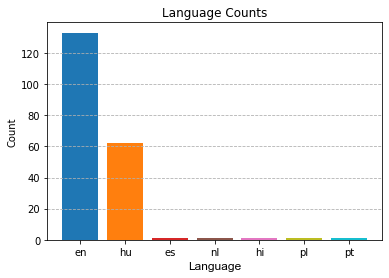

In [24]:
data = {'en': 133, 'hu': 62, 'es': 1, 'nl': 1, 'hi': 1, 'pl': 1, 'pt': 1, 'pl': 1}

languages = list(data.keys())
counts = list(data.values())

# Define a color palette or a set of colors
color_palette = plt.cm.get_cmap('tab10')  # Using the 'tab10' color palette

# Generate a list of colors based on the number of data points
num_colors = len(data)
colors = color_palette(np.linspace(0, 1, num_colors))

plt.bar(languages, counts, color=colors)

plt.xlabel('Language', fontname='Arial', fontsize=12)
plt.ylabel('Count')
plt.title('Language Counts')

# Add grid lines
plt.grid(axis='y', linestyle='--')

plt.show()

In [33]:
visualizations = defaultdict()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
languages = defaultdict()

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running the next cell will take some time.
If you want to explore countries separately, please run the following code. Insert the country name instead of the 'county' variable

country = Country(f'{country}', force_preprocess=True, delete_repetitions=True)

country.find_topics(div_songs=False, filter_extremes=True, topics=5, epochs=200)

In [51]:
# for name in countries:
#     print("Processing the country", name.capitalize())
#     country_name = name
#     name = process_country(f'{name}', force_preprocess=True, delete_repetitions=True)
#     languages[country_name] = name.langs
#     name.find_topics(topics=5, filter_extremes=True, epochs=200)
#     print("Saving the visualization for", country_name.capitalize())
#     visualizations[country_name] = name.visualize

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
